In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Files to load
file_to_load = "Resources/city_data.csv"

# Files to read
city_data_df = pd.read_csv("Resources/city_data.csv")
#city_data_df.head(10)

In [3]:
# Files to load
file_to_load = "Resources/ride_data.csv"

# Files to read
ride_data_df = pd.read_csv("Resources/ride_data.csv")
#ride_data_df.head(10)

In [4]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [6]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]==("Urban"))

66

In [9]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]==("Suburban"))

36

In [10]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]==("Rural"))

18

In [11]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [13]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])
#pyber_data_df.head(10)

In [15]:
# Create the "urban, rual, suburban" city DataFrame(s)
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
#rural_cities_df.head()

In [16]:
# Get the number of rides for each city type
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
#urban_ride_count.head()

In [17]:
# Get the average fare for each city type
urban_avg_fair = urban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fair = rural_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fair = suburban_cities_df.groupby(["city"]).mean()["fare"]
#urban_average_fair.head()

In [18]:
# Get the average number of drivers for each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

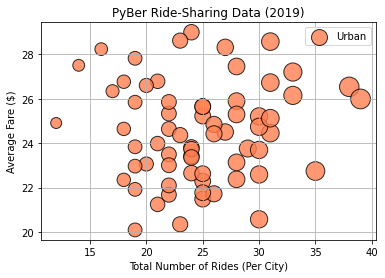

In [19]:
# 5.3.5
# Build the scatter plots for urban cities
# Change the size of the markers using s=
# Change the color of the markers using c=
# Change the border color of the markers using edgecolor=
# Change the border lines of the markders using linewidth=
# Change the font size by usig alpha=
# Add a title, name the y & x asis
plt.scatter(urban_ride_count, urban_avg_fair,
            s=10*urban_ride_count, c="coral",
            edgecolor="black", linewidth=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend.
plt.legend()

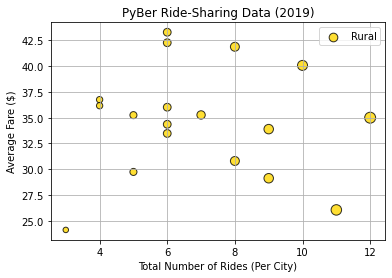

In [20]:
#5.3.5
# Do the same for rural
plt.scatter(rural_ride_count, rural_avg_fair,
            s=10*rural_ride_count, c="gold",
            edgecolor="black", linewidth=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend.
plt.legend()

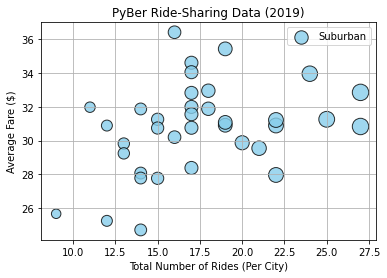

In [21]:
#5.3.5
# Do the same for suburban
plt.scatter(suburban_ride_count, suburban_avg_fair,
            s=10*suburban_ride_count, c="skyblue",
            edgecolor="black", linewidth=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend.
plt.legend()

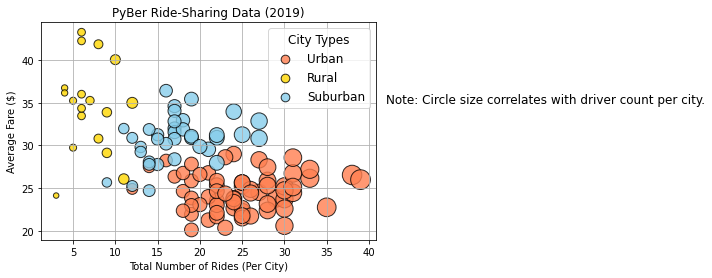

In [23]:
#5.3.5
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count, urban_avg_fair,
            s=10*urban_ride_count, c="coral",
            edgecolor="black", linewidth=1,
            alpha=0.8, label="Urban")

plt.scatter(rural_ride_count, rural_avg_fair,
            s=10*rural_ride_count, c="gold",
            edgecolor="black", linewidth=1,
            alpha=0.8, label="Rural")


plt.scatter(suburban_ride_count, suburban_avg_fair,
            s=10*suburban_ride_count, c="skyblue",
            edgecolor="black", linewidth=1,
            alpha=0.8, label="Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()